Brownian particle in a box.

Consider a particle confined by the interval $[−L/2, L/2]$ with $L = 100$ and moving according to equation $$x^{(n)}_{j+1} =x^{(n)}_j \pm \sigma \Delta t$$  $$x^{(n)}_{j+1} =x^{(n)}_j \pm 1.$$ Following the notation used in exercise 7.1.1, take $\sigma = 1$, $\Delta t = 0.01 s$, and $x_0 = 0$. Implement reflective boundary conditions:

$x_j \rightarrow −L−x_j$ for $x_j \leq  -\frac{L}{2}$

$x_j \rightarrow x_j$ for $-\frac{L}{2}\leq x_j \leq  \frac{L}{2}$

$x_j \rightarrow L−x_j$ for $x_j >  \frac{L}{2}$

Simulate $N=10^4$ independent trajectories for various durations (e.g. $T_{tot}= 10, 10^2,10^3,10^4,10^5$ s) and plot the histograms of the final positions. Compare your results with figures 7.3(a) and 7.3(b).

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import trange

A = 7
steps = 10**A+1         # Number of iterations 
N = 10000
x = np.zeros((1,N))          # Pre allocation of the positions
L = 100
dt = np.sqrt(0.01)
results = np.zeros((5,N))
counter = 0

for i in trange(steps):
    x = x + np.random.choice([-dt, dt], size=(1,N))
    x = np.where(x > L/2, L-x, x)
    x = np.where(x < -L/2, -L-x, x) 
    
    if i in [10**(A-4),10**(A-3),10**(A-2),10**(A-1),10**(A)]:
        results[counter, :] = x
        counter += 1                
    

100%|██████████| 10000001/10000001 [11:53<00:00, 14018.30it/s]


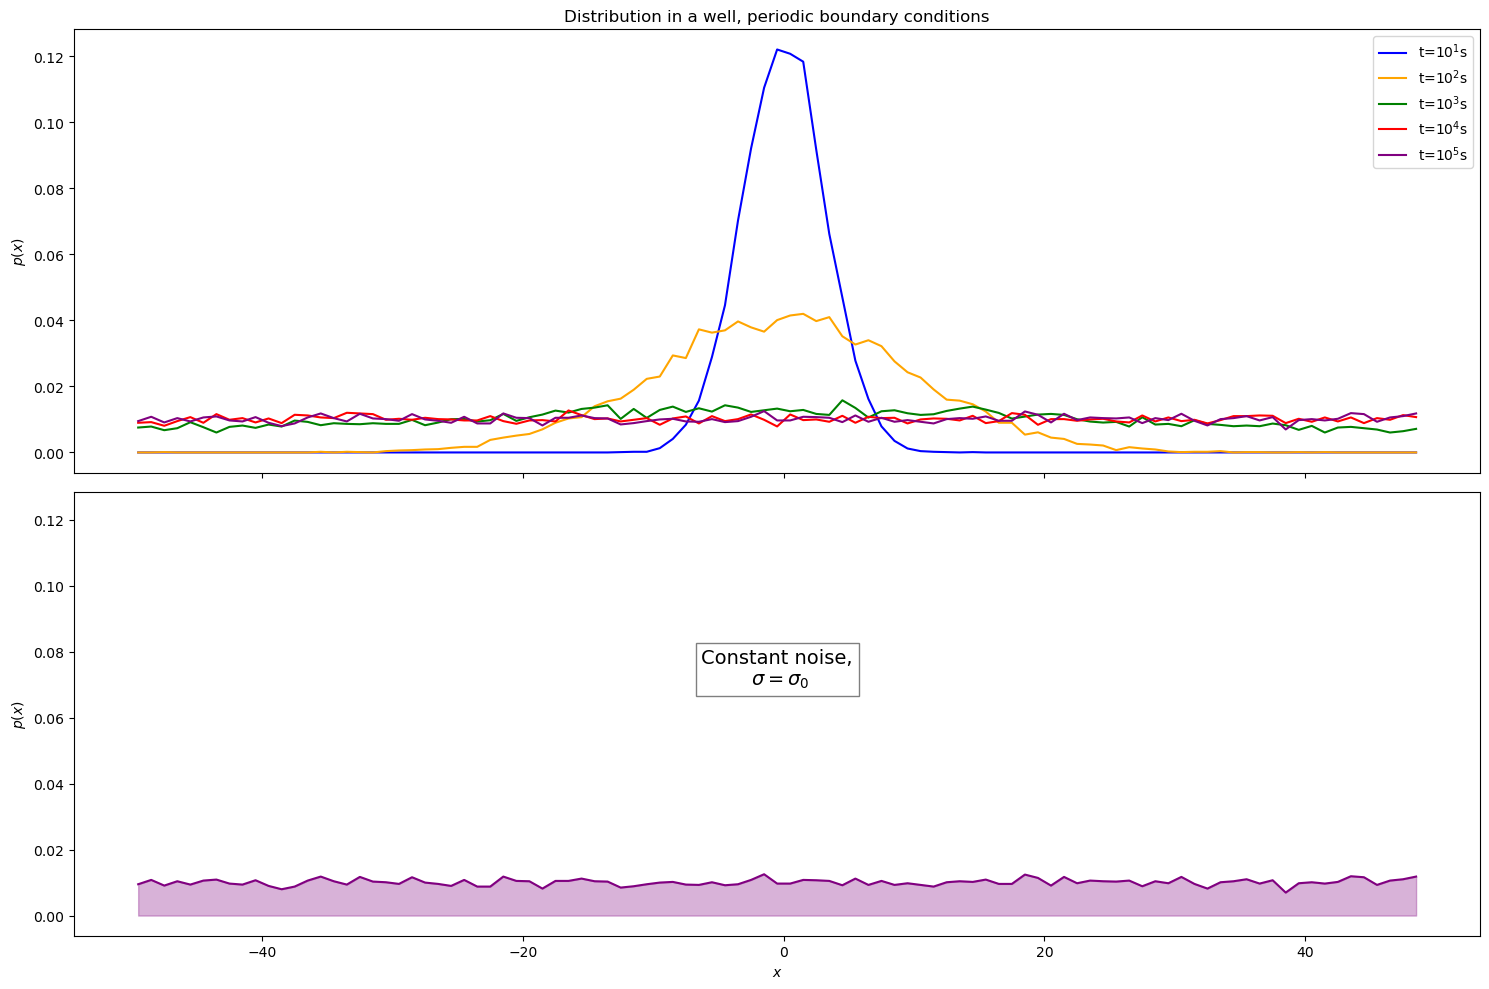

In [4]:
l = np.arange(100) - 50
h10 = np.histogram(results[0, :], l, density=True)
h100 = np.histogram(results[1, :], l, density=True)
h1000 = np.histogram(results[2, :], l, density=True)
h10000 = np.histogram(results[3, :], l, density=True)
h100000 = np.histogram(results[4, :], l, density=True)

# Create a figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot for the first subplot
axs[0].plot(h10[1][:-1] + 1/2, h10[0], color='blue')
axs[0].plot(h100[1][:-1] + 1/2, h100[0], color='orange')
axs[0].plot(h1000[1][:-1] + 1/2, h1000[0], color='green')
axs[0].plot(h10000[1][:-1] + 1/2, h10000[0], color='red')
axs[0].plot(h100000[1][:-1] + 1/2, h100000[0], color='purple')

axs[0].legend(['t=$10^1$s', 't=$10^2$s', 't=$10^3$s', 't=$10^4$s', 't=$10^5$s'])
axs[0].set_ylabel('$p(x)$')
axs[0].set_title('Distribution in a well, periodic boundary conditions')

# Plot for the second subplot (same as the last histogram)
axs[1].plot(h100000[1][:-1] + 1/2, h100000[0], color='purple')
axs[1].fill_between(h100000[1][:-1] + 1/2, h100000[0], color='purple', alpha=0.3)
axs[1].set_ylabel('$p(x)$')
axs[1].set_xlabel('$x$')
axs[1].set_ylim(axs[0].get_ylim())
axs[1].text(0.5, 0.65, 'Constant noise,\n $\sigma = \sigma_0$', transform=axs[1].transAxes,
            verticalalignment='top', horizontalalignment='center', color='black',
            fontsize=14, bbox=dict(facecolor='white', alpha=0.5))


plt.tight_layout()
plt.show()